(1080, 1920, 3)


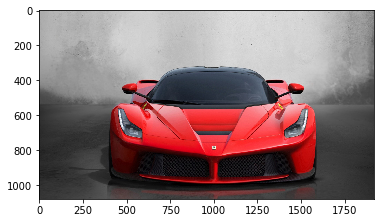

In [194]:
# import neccessary libraries

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageOps

# -----------------------------------------------------------------
# testing tensor RGB grayscale method, ended up not being gray
vegeto = np.array(Image.open('fer.jpg'))
vegeto_tensor = torch.from_numpy(vegeto)

chan_r = vegeto_tensor[:,:,0].numpy()
chan_g = vegeto_tensor[:,:,1].numpy()
chan_b = vegeto_tensor[:,:,2].numpy()

result = (chan_r + chan_g +  chan_b)/3.0

result_nparr = np.array(result)

#plt.imshow(result)
#plt.imshow(result_nparr)
# end RGB tensor test
# -------------------------------------------------------------------

# open color img
col_img_obj = Image.open('fer.jpg')

# convert color img obj to numpy array
col_img_nparr = np.array(col_img_obj)

# get color img shape
col_img_shp = col_img_nparr.shape


#  850px height, 1332px width, 3 channel RGB
print (col_img_shp)


# use matplot to plot
#plt.imshow(col_img_nparr)

# because object, doesn't print out matrix values
#plt.imshow(gry_img_obj)
#plt.imshow(gry_img_nparr)

plt.imshow(col_img_obj)

(1080, 1920)


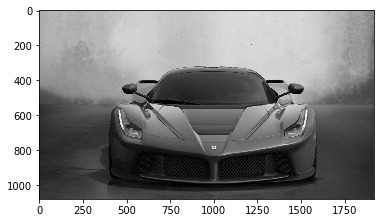

In [195]:
# convert to gray img
gry_img_obj = ImageOps.grayscale(col_img_obj)

# convert gray img obj to numpy array
gry_img_nparr= np.array(gry_img_obj)

# get gray img shape
gry_img_shp = gry_img_nparr.shape

# 1332x850 width*height, 0 channels RGB 2d matrix
print(gry_img_shp)

plt.imshow(gry_img_obj)

saveImg = Image.fromarray(gry_img_nparr.astype('uint8'))
saveImg.save('fer_grayscale.JPG')

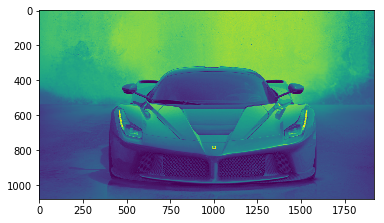

In [196]:
# why is the numpy array of same object greenish?
plt.imshow(gry_img_nparr)


The ratio is 0.20232301311728396


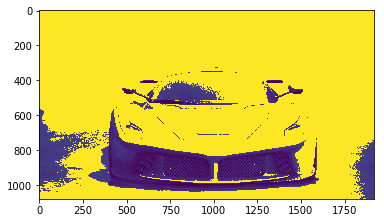

In [228]:
# ------------------------------
# testing with 255's matrix
# -----------------------------

#pix = col_img_obj.load()

#a_ones = np.ones(col_img_nparr_shp)

#print (a_ones)

#for x in range(1332):
    #for y in range(850):
        #if pix[x,y] > (0,0,255):
            #pix[x,y] = (255,255,255)
            
# a_zeros = np.zeros()

# intialized matrix that is 850x1332 with values of 255.
#a_255 = np.full((850,1332),255)
matrx_255 = np.full((1080,1920),255)

limit = 50
area = 0
# iterate thru the matrix a_255 and COPY values < 50 from original gray scale image, gry_img_nparr   
for x in range(gry_img_shp[0]):
    for y in range(gry_img_shp[1]):
        pixel = gry_img_nparr[x,y]
        if pixel < limit:
            matrx_255[x,y] = gry_img_nparr[x,y]
            area = area + 1
        
# why does it show up yellow/blue but when I save it, it is almost pure white?
plt.imshow(matrx_255)

ratio = area/(1080 * 1920)
print ("The ratio is %s" % str(ratio))

In [229]:
saveImg = Image.fromarray(matrx_255.astype('uint8'))
saveImg.save('fer_255s_50.JPG')

(1080, 1920, 3)


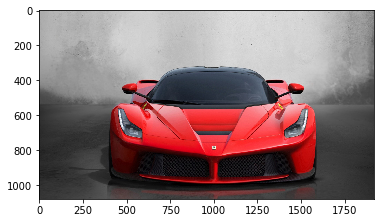

In [199]:
# start car test

pil_car = Image.open('fer.jpg')
np_car = np.array(pil_car)

car_shape = np_car.shape
print (car_shape)

plt.imshow(np_car)

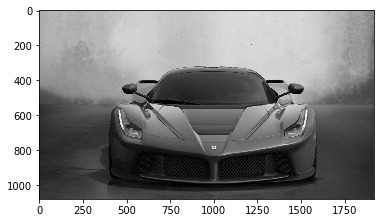

In [200]:
# covert to grayscale (parameter needs be PIL img)
gray_car = torchvision.transforms.functional.to_grayscale(pil_car, num_output_channels=1)

gray_car_2 = torchvision.transforms.functional.to_grayscale(pil_car, num_output_channels=1)

plt.imshow(gray_car)

In [230]:
pix = gray_car_2.load()

print (gray_car.size)  # Get the width and hight of the image for iterating over

#print (pix[x,y])  # Get the RGBA Value of the a pixel of an image
#pix[x,y] = 50  # Set the RGBA Value of the image (tuple)

#im.save('alive_parrot.png')  # Save the modified pixels as .png

#plt.imshow(pix)

# directly acessing pixels
#for x in range(gray_car.size[0]):
    #for y in range(gray_car.size[1]):
        #if pix[x,y] > 100:
           # pix[x,y] = 255
        
        
#plt.imshow(gray_car_2)

(1920, 1080)


6220800
(1080, 1920, 3)


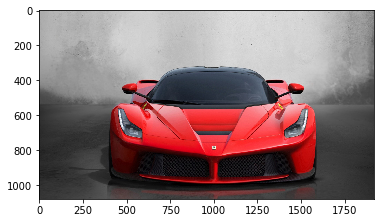

In [202]:
# -------------------------
# testing with 0's matrix -
#--------------------------

plt_vegeto = Image.open('fer.jpg')
np_vegeto = np.array(plt_vegeto)

vegeto_size = np_vegeto.size
print (vegeto_size)

vegeto_shape = np_vegeto.shape
print (vegeto_shape)

plt.imshow(np_vegeto)

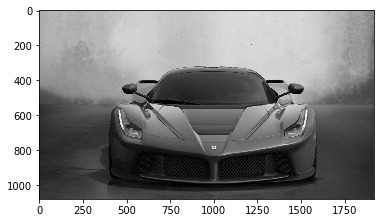

In [203]:
# convert PIL img to gray
gry_vegeto = torchvision.transforms.functional.to_grayscale(plt_vegeto, num_output_channels=1)

#convert gray vegeto PIL to np array
gry_np_vegeto = np.array(gry_vegeto)

plt.imshow(gry_vegeto)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1080, 1920)
The ratio is 0.5097622492283951


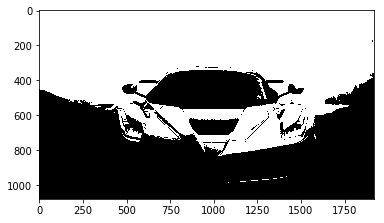

In [235]:
new_matrx = np.zeros(vegeto_shape)

limit = 100
area = 0

# directly acessing pixels
for i in range(gry_np_vegeto.shape[0]):
    for j in range(gry_np_vegeto.shape[1]):
        pixel = gry_np_vegeto[i,j]
        if pixel > limit:
            new_matrx[i,j] = gry_np_vegeto[i,j]
            area = area + 1
            
plt.imshow(new_matrx)

print (gry_np_vegeto.shape)

ratio = area/(1080 * 1920)
print ("The ratio is %s" % str(ratio))

In [234]:
saveImg = Image.fromarray(new_matrx.astype('uint8'))
saveImg.save('fer_0s_200.JPG')
